# Two Qubit CCD

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from quantum_classes import *
from pauli_matrices import *

In [3]:
# Create a quantum system with a single qubit
natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6

# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, rabi_freq/4, rabi_freq, 0


hamiltonian = Quantum_Hamiltonian(rabi_freq, 1, np.array([natural_freq]))
system = Quantum_System(hamiltonian, 1)

In [19]:
# Create a quantum system with a single qubit
natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6

# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, rabi_freq/4, rabi_freq, 0, 

# Integration parameters
tol = 10**-6
evaluation_points = 1000
evaluation_time = 5*10**-6


# Points at which to evaluate the solution for 2 qubits
initial_state_2q = np.array([0 + 0j, 1 + 0j, 0 + 0j, 0 + 0j])  

# Create a quantum system with two qubits
hamiltonian_2q = Quantum_Hamiltonian(rabi_freq, 2, np.array([natural_freq, natural_freq+10**6]))
system_2q = Quantum_System(hamiltonian_2q, 2)

natural_freqs = [natural_freq, natural_freq+20*10**6]

In [6]:

# Evolve the system in lab frame
t, y_lab_2q = system_2q.evolve_state(initial_state_2q, evaluation_time, evaluation_points, 
                                    ham_type='ccd_lab_multiple', driving_freq=driving_freq,
                                    phi_0=phi_0, epsilon_m=epsilon_m, 
                                    phase_freq=phase_freq, theta_m=theta_m, coupling = 1*10**6,
                                    rtol=tol, atol=tol)


In [20]:
# Evolve the system in rotating wave approximation
t, y_rwa_2q = system_2q.evolve_state(initial_state_2q, evaluation_time, evaluation_points, 
                                    ham_type='ccd_rwa_multiple', driving_freq=driving_freq, natural_freqs = natural_freqs,
                                    phi_0=phi_0, epsilon_m=epsilon_m, 
                                    phase_freq=phase_freq, theta_m=theta_m, coupling = 0*10**6)

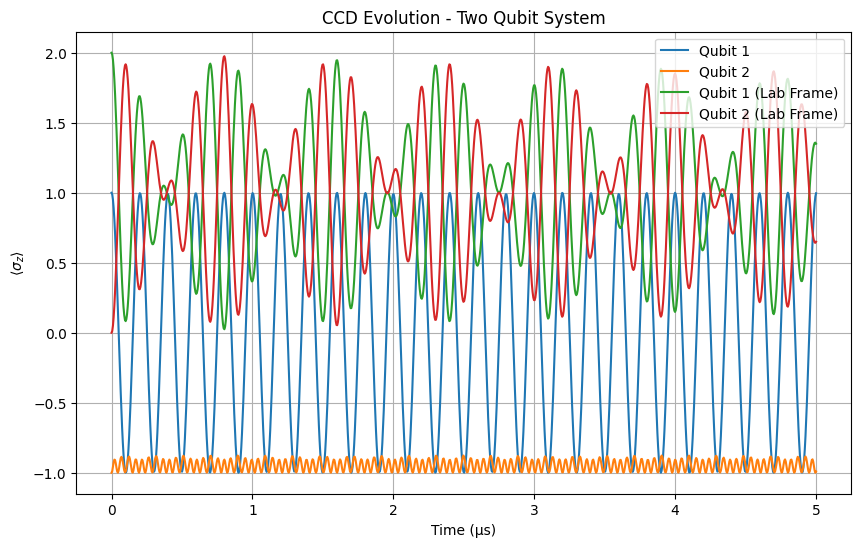

In [21]:
# Convert time to microseconds
t_micro = t * 10**6

# Calculate z expectations for both qubits
z_expectation_1_lab = np.array([state.conj() @ (np.kron(sigma_z, identity) @ state) for state in y_lab_2q])
z_expectation_2_lab = np.array([state.conj() @ (np.kron(identity, sigma_z) @ state) for state in y_lab_2q])
z_expectation_1_rwa = np.array([state.conj() @ (np.kron(sigma_z, identity) @ state) for state in y_rwa_2q])
z_expectation_2_rwa = np.array([state.conj() @ (np.kron(identity, sigma_z) @ state) for state in y_rwa_2q])


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_micro, np.real(z_expectation_1_rwa), label='Qubit 1')
plt.plot(t_micro, np.real(z_expectation_2_rwa), label='Qubit 2')
plt.plot(t_micro, np.real(z_expectation_1_lab+1), label='Qubit 1 (Lab Frame)')
plt.plot(t_micro, np.real(z_expectation_2_lab+1), label='Qubit 2 (Lab Frame)')
plt.xlabel('Time (µs)')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.title('CCD Evolution - Two Qubit System')
plt.legend()
plt.grid(True)
plt.show()

so have confirmed that the isotropic coupling doesnt change in the rotating frame

try to sweep and see both resonances
how close together they are 
fix rabi 
explore other params sideways

construct two bit gates and single qubit gates - normal non dressed states